<a href="https://colab.research.google.com/github/pascuapablo/CEIA/blob/master/src/ComputerVisionII/Clase_1_capas_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capas convolucionales: CONV y POOL

Vamos a implementar los dos tipos de capas presentadas en la clase teórica. La capa convolucional y la capa de pooling (max y average).

**Notación**:
- Superíndice $[l]$ denota un elemento de la capa $l^{th}$. 
    - Ejemplo: $a^{[3]}$ es la activación de la $4^{ta}$ capa. $W^{[3]}$ and $b^{[3]}$ son los parámetros de la $3^{er}$ capa.

- Superíndice $(i)$ denota un elemento que pertenece al ejemplo con índice i.
    - Ejemplo: $x^{(i)}$ es el iésimo ejemplo de entrada.
    
- Subíndice $i$ denota a la iésima entrada de un vector.
    - Ejemplo: $a^{[l]}_i$ denota la iésima entrada de las activaciones en la capa $l$ (si asumimos una capa Fully Connected).
    
    
- $n_H$, $n_W$ y $n_C$ denotan la altura, el ancho y número de canales de una determinada capa, respectivamente. Si queremos referenciar a una capa específica $l$, se puede escribir $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ y $n_{C_{prev}}$ denotan la altura, el ancho y la cantidad de canales de la capa anterior, respectivamente. Si nos estamos refiriendo a una capa específica $l$, esto puede ser referenciado como  $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

## 1 - Importación de paquetes.


In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1) # permite que todas las llamadas a funciones aleatorias sean iguales en todas las corridas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Qué vamos a hacer?

Hay que implementar los dos elementos fundamentales de una red convolucional. 

- Funciones convolucionales:
    - Zero Padding
    - Convolucionar en una ventana
    - Paso forward de una convolución
    
- Funciones de pooling:
    - Paso forward de pooling
    - Crear una máscara
    - Distribuir valores

Vamos a implementar todo esto usando funciones elementales de `numpy`.

## 3 - Redes Neuronales Convolucionales (Convolutional Neural Networks o CNN)

Una capa convolucional transforma un volumen de entrada en un volumen de salida de diferente tamaño:

<img src="https://drive.google.com/uc?export=view&id=1PwpyKKNylBN6MJoN2APeNzjXIYZ9yilO" style="width:350px;height:200px;">

En esta parte vamos a implementar una capa convolucional. Primero programamos dos funciones que nos van a ayudar: 
- zero padding (rellenar con ceros en los bordes)
- computar la convolución para un sub-rectángulo de la entrada

### 3.1 - Zero-Padding

Zero-padding agrega ceros en los bordes de una imagen:

<img src="https://drive.google.com/uc?export=view&id=1JjdIwqA9e6jSrkMHiEV5k97py9LH4sUl" style="width:600px;height:400px;">
<caption><center> <u> <font color='white'> **Figura 1** </u><font color='white'>  : **Zero-Padding**<br> Imagen (3 canales, RGB) con padding de 2. </center></caption>

    
¿Para qué hacemos zero-padding?

- Permite utilizar una capa CONV sin necesariamente dismuniuir la altura y el ancho de los volúmenes. Si construímos una red muy profunda y no usamos esto, la altura/ancho de la imagen se contrairían a medida que avanzamos en las capas. Nos permite hacer una convolución 'same' (misma), o sea que la altura y el ancho de la imagen se preservan para la próxima capa.

- Nos permite utilizar mejor la información en el borde de la imagen. Sin padding muy pocos valores de la capa siguiente dependen de los valores en los bordes.

**Ejercicio**: Implementar la siguiente función, que completa con ceros todas las imágenes de un batch de ejemplos X. [tip: usar np.pad (https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)] . Obs.: Si queremos rellenar un array "a" de dimensión $(5,5,5,5,5)$ con 1 cero de relleno en la segunda dimensión, 3 ceros de relleno en la cuarta dimensión y ningún relleno en las otras dimensiones, haríamos:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))
```    


In [ ]:
def zero_pad(X, pad):
    """
    Rellenar con bordes con ceros las imágenes del dataset X. El relleno es aplicado a la altura y al ancho de la imagen,
    como se ve en la Figura 1.
    
    Argumento:
    X -- array de numpy con dimensiones (m, n_H, n_W, n_C) que representa un batch de m imágenes
    pad -- entero, cantidad de relleno alrededor de cada imagen en las direcciones horizontal y vertical
    
    Retorna:
    X_pad -- imagen con ceros agregados de dimensión (m, n_H + 2*pad, n_W + 2*pad, n_C)
    
    """
    
    ### Completar el código ### 
    x_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant', constant_values = (0,0))

    ### fin del código ###
    
   

    return x_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


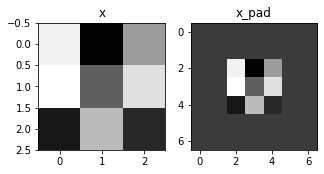

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

**Salida Esperada**:

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

### 3.2 - Un paso de convolución

Es esta parte vamos a implementamos un paso de convolución, en el cual aplicamos un filtro a una sola posición de la entrada. Esto va a ser utilizado para construir una unidad convolucional, que:

- Recibe un volumen de entrada
- Aplica un filtro a cada posición de la entrada
- Devuelve otro volumen

<img src="https://drive.google.com/uc?export=view&id=1lD-xJ-dqyO4CmXBDN4Xnb-wwVb3n5fsd" style="width:500px;height:300px;">
<caption><center> <u> <font color='white'> **Figura 2** </u><font color='white'> : **Operación de convolución** <br> con filtro de 3x3 y una stride de 1 </center></caption>

En una aplicación de visión por computador, cada valor en la matriz de la izquierda corresponde a un solo pixel, y convolucionamos un filtro de 3x3 con la imagen multiplicando sus valores elemento a elemento con la matriz original, sumándolos y agregando un bias. En la primera parte del ejercicio hay que implementar un paso simple de la convolución, correspondiendo a aplicar un filtro a una sola de las posicionas para obtener un solo valor de salida.
    
Luego vamos a implementar una función que aplica la función de más arriba a múltiples posiciones de la entrada para obtener la operación convolucional completa.
    
**Ejercicio**: Implementar conv_single_step(). [Tip](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).


**Obs.**: La variable b se pasa como un array de numpy. Si agregamos un valor escalar (un float o un entero) a un array numpy, el resultado es un array. En el caso especial en que el array de numpy contiene un solo valor, podemos castearlo a float para convertirlo a un valor escalar.

In [ ]:
def conv_single_step(a_slice_prev, W, b):
    """
    Aplicar un filtro definido por parámetros W a una sola slice (a_slice_prev) de una salida de activaciones de una capa
    anterior.
    
    Argumentos:
    a_slice_prev -- Slice de datos de entrada de dimensiones (f, f, n_C_prev)
    W -- Pesos del filtro con dimensiones (f, f, n_C_prev)
    b -- Parámetros de bias representados por una matriz de dimensiones (1, 1, 1)
    
    Returna:
    Z -- un valor escalar, resultado de convolucionar la ventana (W, b) que se desplaza sobre un sub-rectángulo x de
         los datos de entrada
    """

    ### Comienzo del código ### (≈ 2 líneas de código)
    # Producto elemento a elemento entre a_slice_prev y W, NO sumar el bias aún
    s = a_slice_prev * W
    # Suma sobre todas los elementos del volumen s
    Z = np.sum(s)
    # Sumar b a Z. Castear b a un float() de manera que Z resulta en un valor escalar
    Z = float(Z + b)
    ### Fin del código ###

    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


**Salida Esperada**:
<table>
    <tr>
        <td>
            **Z**
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

### 3.3 - Redes Neuronales Convolucionales - Forward pass

En el forward pass tomamos varios filtros y los convolucionamos con la entrada. Cada convolución devuelve como resultado una matriz 2D. Esas matrices se apilan para obtener un volumen 3D:

<center>
<img width="620" height="440" src="https://drive.google.com/uc?export=view&id=1jKGVfDT5gi3g7xCp1tnZhMAOpK10LQGJ">
</center>


**Ejercicio**: 
Implementar la función más abajo para convolucionar los filtros `W` con las activaciones de entrada `A_prev`.
Esta funcion recibe las siguientes entradas:
* `A_prev`, activaciones de salida de la capa anterior (para un batch de m entradas);
* Los pesos de los filtros son denotados con `W`.  El tamaño del filtro es `f` por `f`.
* Un vector de bias `b`, donde cada filtro tiene su propio valor escalar de bias.

Finalmente también tiene acceso a un diccionario de hiperparámetros que contiene la `stride` (zancada) y el `padding` (relleno).

**Tip**: 
1. Para seleccionar una slice de 2x2 de la esquina superior izquierda de una matriz "a_prev" (dimensiones (5,5,3)) se puede hacer:
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
Notar como esto resulta en una matriz 3D que tiene altura 2, ancho 2 y profundidad 3. La profundidad es el número de canales.
Esto va aser útil cuando definamos `a_slice_prev` más abajo, usando los índices `start/end` qye vamos a definir.

2. Para definir a_slice hay que primero definir sus esquinar `vert_start`, `vert_end`, `horiz_start` y `horiz_end`.
Esta figura puede ser útil para determinar cómo cada esquina puede ser definida usando h, w, f y s en el código de abajo.

<img src="https://drive.google.com/uc?export=view&id=1KjAJXzfUToZHu5MEMlZYclxiMkrDw0MB" style="width:400px;height:300px;">
<caption><center> <u> <font color='white'> **Figure 3** </u><font color='white'>  : **Definición de una slice usando definiciones verticales y horizontales de comienzo/fin (con un filtro de 2x2)** <br> Esta figura muestra sólo un canal.  </center></caption>


**Recordar**:
Las fórmulas relacionadas con las dimensiones de salida de la convolución con la dimensión de la entrada son: 
    
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{cantidad de filtros usados en la convolucion}$$

Para este ejercicio no es necesario vectorizar y se puede implementar todo con bucles for.

#### Tips adicionales si es muy difícil

* Usar subselección (slicing) de un array (e.g.`variable[0:1,:,3:5]`) para las siguientes variables:
  `a_prev_pad` ,`W`, `b`  
  Copiar parte del código y correrlo fuera de la función, en celdas separadas. 
  Chequear que el sub-array de cada array tiene las dimensiones esperadas.
  
* Para decidir cómo obtener vert_start, vert_end; horiz_start, horiz_end, recordar que todos son índices de capas previas. Dibujar un ejemplo con la capa previa rellenada con ceros (8x8, por ejemplo), y la capa actual (capa de salida) (2x2, por ejemplo).
  
  Los índices de la capa de salida están denotados por `h` y `w`.  
* Asegurarse de que `a_slice_prev` tiene altura, ancho y profundidad.
* Recordar que `a_prev_pad` es un subconjunto de `A_prev_pad`.  
  Pensar acerca de cuál debe ser usado dentro de los bucles for.

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implementa un forward pass de una función de convolución
    
    
    Argumentos:
    A_prev -- activaciones de salida de una capa anterior, 
        array de numpy de dimensiones (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Pesos de los filtros, array de numpy de tamaño (f, f, n_C_prev, n_C)
    b -- Vector de bias, array de numpy de tamaño (1, 1, 1, n_C)
    hparameters -- diccionario de python conteniendo "stride" y "pad"
        
    Retorna:
    Z -- salidad de la convolución, array de numpy de dimensiones (m, n_H, n_W, n_C)
    cache -- valores que son necesarios en el caso de implementar una función conv_backward() para el backward pass
    """
    
    ### Comienzo del código ###
    # Recuperar las dimensiones de A_prev
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Recuperar las dimensiones de W
    (f, f, n_C_prev, n_C) = W.shape
    
    # Recuperar la información de los hparameters
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Computar las dimensines del volumen de salida CONV usando la fórmula dada más arriba
    # Tip: usar int() para aplicar la operación 'floor'.
    n_H = f
    n_W = f
    
    # Inicializar el volumen de salida Z con ceros.
    Z = np.zeros((m,n_H,n_W,n_C))
    
    # Crear un A_prev_pad rellenando con ceros los bordes de A_prev
    A_prev_pad = zero_pad(A_prev,pad)
    
    for i in range(m):               # iterar a través del batch de ejemplos
        a_prev_pad = A_prev_pad[i]               # seleccionar el ejemplo i-ésimo de la activación rellenada con ceros

        for h in range(n_H):           # iterar sobre el eje vertical del volumen de salida
            # Encontrar el comienzo y fin verticales de la "slice" actual
            vert_start = h * f
            vert_end = (h + 1) * f
            
            for w in range(n_W):       # iterar sobre el eje horizontal del volumen de salida
                # Encontrar el comienzo y fin en el eje horizontal de la "slice" actual
                horiz_start = w *f
                horiz_end = (w+1) * f
                
                for c in range(n_C):   # iterar sobre los canales (# de filtros) del volumen de salida
                                        
                    # Usar las esquinas halladas para definir una slice 3D de a_prev_pad
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolucionar la slice 3D con el filtro correcto en W y el bias b
                    # para obtener la salida de una 'neurona'
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,weights,biases)

                                        
    ### Fin del código ###
    
    # Verificar que el volumen de salida tiene las dimensiones correctas
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Guardar la info en "cache" para el paso de backprop 
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.23414049349017446
Z[3,2,1] =
 [ 1.81217709 -0.51748982  1.4932228  -0.92864428  2.17227052 -0.82565389
 -0.46333797  0.29695737]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


**Salida esperada**:
```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

Finalmente, la capa CONV debe también aplicar una función de activación, en cuyo caso habría que agregar el siguiente código:

```python
# Convolucionar el sub-rectángulo para obtener el valor de la neurona de salida
Z[i, h, w, c] = ...
# Aplicar la función de activación
A[i, h, w, c] = activation(Z[i, h, w, c])
```

Este paso no lo hacemos en este ejercicio.


## 4 - Pooling layer 

La capa de pooling (POOL) reduce la altura y el ancho de la entrada. Ayuda a reducir costos de cómputo y hace los detectores de features más invariantes a su posición dentro de la entrada. Hay dos tipos de capas `pooling`:

- Capa Max-pooling: desplaza una ventana ($f, f$) sobre la entrada y guarda el valor máximo que observa la ventana en la salida.

- Capa Average-pooling: desplaza una ventana ($f, f$) sobre la entrada y guarda el valor promedio de la ventana en la salida.

<table>
<td>
<img src="https://drive.google.com/uc?export=view&id=1CfBogHLuT6TtChS5rEb6iHeI_6AyKIoT" style="width:500px;height:300px;">
<td>

<td>
<img src="https://drive.google.com/uc?export=view&id=1Ou7jpZ4G-DbFd6_xwFLQlZKq-VlL0aJY" style="width:500px;height:300px;">
<td>
</table>

Estas capas de polling no tienen parámetros para entrener en el paso de backprop. De todas maneras tienen hiperparámetros como el tamaño de la ventana $f$. Esto especifica la altura y el ancho de la ventana sobre la cual se computa el máximo o el promedio.

### 4.1 - Pooling en la dirección forward
Vamos a implementar MAX-POOL y AVG-POOL en la misma función.

**Ejercicio**: Implementar el forward pass de la capa de pooling. Hay algunos tips en el código a completar abajo.

**Recordar**:
Como no hay padding (relleno con ceros), las fórmulas que relacionan las dimensiones de la capa de salidad con las de la capa de entrada son:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implementa el forward pass de la capa pooling
    
    Argumentos:
    A_prev -- Data de entrada, array de numpy con dimensiones (m, n_H_prev, n_W_prev, n_C_prev).
    hparameters -- diccionario de python conteniendo "f" y "stride".
    mode -- El tipo de pooling a utilizar, definido con una string ("max" o "average")
    
    Retorna:
    A -- salida de la capa de pooling, un array de numpy con dimensiones (m, n_H, n_W, n_C)
    cache -- cache de información devuelta en el backward pass de la capa de pooling, contiene parámetros de entrada
             y hparameter
    """
    
    # Recuperar las dimensiones de la entrada
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Recuperar hiperparámetros de "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Definir dimensiones de la salida
    print(1 + (n_H_prev - f) / stride)
    n_H = round(1 + (n_H_prev - f) / stride)
    n_W = round(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Inicializar la matriz A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### Comienzo del código ###
    for i in range(m):                         # iterar sobre los ejemplos de entrenamiento
        for h in range(n_H):                     # iterar sobre el eje vertical del volumen de salida
            # encontrar los índices de inicio y fin de la "slice actual"
            vert_start = stride * h 
            vert_end = (h+1)* stride * f
            
            for w in range(n_W):                 # iterar sobre el eje horizontal del salida 
                # encontrar los índices inicial y final en la dimensión vertical 
                # dentro de la "slice" actual                
                horiz_start = stride * w
                horiz_end = stride * (w +1 ) * f
                
                for c in range (n_C):            # iterar sobre los canales del volumen de salida
                    
                    # usar los índices obtenidos para definir la slice actual en el
                    # iésimo ejemplo de A_prev, para el canal c.
                    a_prev_slice = A_prev[i,vert_start:vert_end, horiz_start:horiz_end, c]

                    
                    # Computer la operación de pooling en la slice.
                    # El if sirve para diferenciar los tipos de pooling (max o average)
                    # Tip: usar np.max and np.mean para el caso correspondiente
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### Fin del código a completar ###
    
    # Guardar la entrada y los hparameters en el "cache" para el backward pass
    cache = (A_prev, hparameters)
    
    # Asegurarse de que la salida tiene las dimensiones correctas
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
# Caso 1: stride de valor 1

np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

3.0
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.6924546  1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 1.51981682 2.18557541]
   [1.14472371 1.6924546  2.18557541]
   [1.14472371 1.6924546  2.18557541]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 1.12141771 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 1.12141771 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 1.12141771 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

3.0
mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-0.03010467 -0.00324021 -0.33629886]
   [-0.05962922  0.23156941 -0.19076784]
   [ 0.12893444  0.22242847  0.1250676 ]]

  [[-0.27975654  0.28376644  0.34649982]
   [-0.04552574  0.21149151  0.26348636]
   

** Salida esperada**
```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

In [ ]:
# Caso 2: stride de valor 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

2.0
mode = max
A.shape = (2, 2, 2, 3)
A =
 [[[[1.74481176 1.6924546  2.18557541]
   [1.74481176 1.6924546  2.18557541]]

  [[1.13162939 1.6924546  2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.96710175 1.12141771 1.27375593]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 1.12141771 1.27375593]
   [1.62765075 1.12141771 0.79280687]]]]

2.0
mode = average
A.shape = (2, 2, 2, 3)
A =
 [[[[-0.08747826  0.19315856  0.07307572]
   [ 0.09503587  0.1788947   0.29980898]]

  [[-0.26423268  0.25987362  0.42216357]
   [-0.09525515  0.268511    0.46605637]]]


 [[[ 0.13127224  0.11964292 -0.01802191]
   [ 0.16598307  0.21462959  0.02597065]]

  [[ 0.22539665  0.08727846 -0.07578118]
   [ 0.15077452  0.28911175  0.00123239]]]]


**Salida esperada:**
    
```
mode = max
A.shape = (2, 2, 2, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 2, 2, 3)
A =
 [[[[-0.03010467 -0.00324021 -0.33629886]
   [ 0.12893444  0.22242847  0.1250676 ]]

  [[-0.38268052  0.23257995  0.6259979 ]
   [-0.09525515  0.268511    0.46605637]]]


 [[[-0.17313416  0.32377198 -0.34317572]
   [ 0.02030094  0.14141479 -0.01231585]]

  [[ 0.42944926  0.08446996 -0.27290905]
   [ 0.15077452  0.28911175  0.00123239]]]]
```